In [47]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from src.rnn import *
from src.testfuncs import gen_in_out_one_in_subs
import scipy.integrate as integrate

In [10]:
def gauss(x,sigm,mu): 
    return np.exp(-(x-mu)**2./(2.*sigm**2.))/(2.*np.pi*sigm**2.)**.5

In [11]:
def f_int(x,sigm,mu): 
    return np.tanh(x)**2.*gauss(x,sigm,mu)

In [12]:
def F_int(sigm,mu):
    n = sigm.shape[0] 
    res = np.ndarray((n)) 
    for k in range(n): 
        res[k] = integrate.quad(lambda x: f_int(x,sigm[k],mu[k]),-np.inf,np.inf)[0] 
    return res

In [96]:
N = 500
y_mean_target = 0.05
R_t = 1.

sigm_e = 1.5

T = int(2e5)

rnn = RNN(N=N,y_mean_target=y_mean_target,R_target=R_t)
#rnn.w_in = np.random.normal(0.,1.,(N,1))
rnn.w_in = np.ones((N,1))
sigm_e_dist = np.abs(rnn.w_in[:,0]) * sigm_e

In [97]:
#'''
y, X_r, X_e, a_r, b, y_mean, y_std = rnn.run_var_adapt_R(u_in=None,sigm_e=sigm_e_dist,T=T,T_skip_rec=1000,
                adapt_mode='local',show_progress=True)
#'''

'''
u_in_adapt,u_out = gen_in_out_one_in_subs(T,1)
u_in_adapt *= sigm_e
    
y, X_r, X_e, a_r, b, y_mean, y_std = rnn.run_var_adapt_R(u_in=u_in_adapt,T_skip_rec=1000,adapt_mode='local',
                show_progress=True)
'''

100%|██████████| 199999/199999 [01:06<00:00, 2997.84it/s]


"\nu_in_adapt,u_out = gen_in_out_one_in_subs(T,1)\nu_in_adapt *= sigm_e\n    \ny, X_r, X_e, a_r, b, y_mean, y_std = rnn.run_var_adapt_R(u_in=u_in_adapt,T_skip_rec=1000,adapt_mode='local',\n                show_progress=True)\n"

In [98]:
y_var_pred = 1.-1./(1.+2.*a_r[-1]**2.*rnn.N*rnn.W.var(axis=1)*(y_std[-1]**2.).mean() +2.*X_e.var(axis=0))**.5 - y_mean_target**2.

In [99]:
y_var_pred_interm = 1.-1./(1.+2.*a_r[-1]**2.*X_r[150:].var(axis=0) +2.*X_e.var(axis=0))**.5 - y_mean_target**2.

In [100]:
y_var_pred_exact = F_int((a_r[-1]**2.*rnn.N*rnn.W.var(axis=1)*(y_std[-1]**2.).mean() + X_e.var(axis=0))**.5,np.zeros((N))) - y_mean_target**2.

In [101]:
y_var_pred_exact_interm = F_int((a_r[-1]**2.*X_r[150:].var(axis=0) + X_e.var(axis=0))**.5,np.zeros((N))) - y_mean_target**2.

<IPython.core.display.Javascript object>


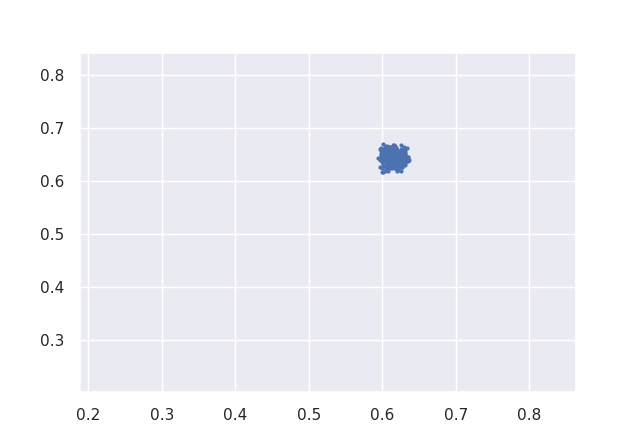

In [115]:
plt.figure()
plt.plot(y_std[-1]**2.,y_var_pred,'.')
#plt.plot(y_std[-1]**2.,y_var_pred_interm,'.')
#plt.plot(y_std[-1]**2.,y_var_pred_exact,'.')
#plt.plot(y_std[-1]**2.,y_var_pred_exact_interm,'.')
plt.show()

<IPython.core.display.Javascript object>


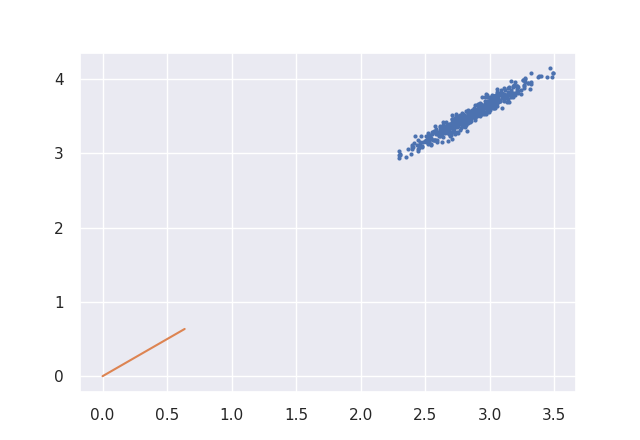

In [117]:
plt.figure()
plt.plot((y_std[-1]**2. + X_e.var(axis=0)),(a_r[-1]**2.*rnn.N*rnn.W.var(axis=1)*(y_std[-1]**2.).mean() + X_e.var(axis=0)),'.')
plt.plot([0.,(y_std[-1]**2.).max()],[0.,(y_std[-1]**2.).max()])
plt.show()

<IPython.core.display.Javascript object>


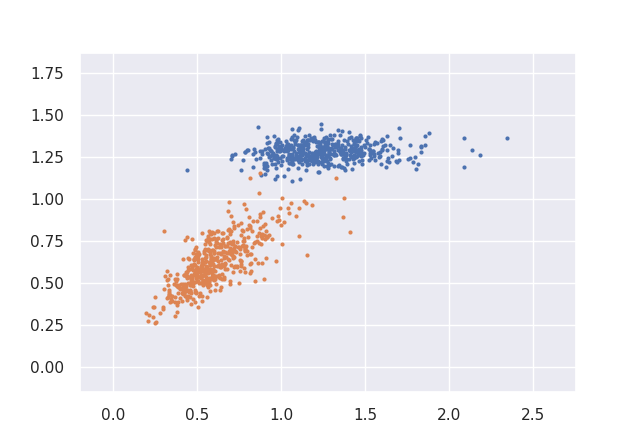

In [111]:
plt.figure()
plt.plot(a_r[-1]**2.*X_r[150:].var(axis=0),a_r[-1]**2.*rnn.N*rnn.W.var(axis=1)*(y_std[-1]**2.).mean(),'.')
plt.plot(X_r[150:].var(axis=0),rnn.N*rnn.W.var(axis=1)*(y_std[-1]**2.).mean(),'.')
plt.axis("equal")
plt.show()


<IPython.core.display.Javascript object>


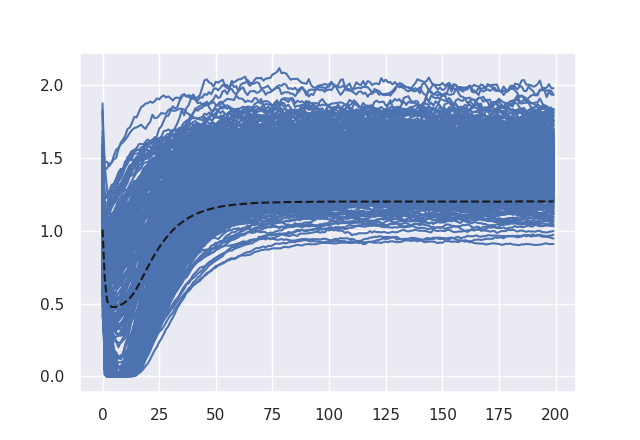

In [114]:
plt.figure()
R = (rnn.W**2.).sum(axis=1)*a_r
plt.plot(R,c='b')
plt.plot(R.mean(axis=1)**.5,'--',c='k')
plt.show()